# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
**NOTE: This project is extremely challenging because it will introduce a lot of new concepts**
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from API finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

**Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html).**

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API.

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [4]:
# Bank of America
BAC = data.DataReader(name="BAC",data_source='yahoo',start=start,end=end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
tickers = 'BAC C MS WFC GS JPM'.split()
tickers

['BAC', 'C', 'MS', 'WFC', 'GS', 'JPM']

**Concatenate the dataframes**

In [10]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], keys=tickers, axis=1)

**Set the column name levels:**

In [11]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.523922  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.146645  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.191933  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.139107  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.161732  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         GS                                         JPM             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.758644  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.784546  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.888165  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.927017  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  38.328484  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.823185  
2006-01-04   31.799999  31.530001  10870000.0  20.581659  
2006-01-05   31.500000  31.495001  10158000.0  20.558811  
2006-01-06   31.580000  31.680000   8403800.0  20.679575  
2006-01-09   31.674999  31.674999   5619600.0  20.676311  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

**What is the max Close price for each bank's stock throughout the time period?**

In [14]:
bank_stocks.xs('Close', axis=1, level=1).head()

Bank Ticker,BAC,C,MS,WFC,GS,JPM
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999


In [15]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
MS     247.919998
WFC     70.080002
GS      89.300003
JPM     58.520000
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [16]:
returns = pd.DataFrame()

**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [17]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,MS Return,WFC Return,GS Return,JPM Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


### 2nd way, without using the pct_change() method

This procedure consists of:
1. Create the dataframe to store the returns.
2. Create the function and make the proper calculations, according to the formula.
3. Feed the dataframe with the correct returns with a for loop
4. Make the first entry NaN value

In [18]:
r_cols = []
for bank in tickers:
    r_cols.append(bank + ' Return')

In [59]:
returns2 = pd.DataFrame(index=bank_stocks.index, columns=r_cols)

In [60]:
returns2.head()

,BAC Return,C Return,MS Return,WFC Return,GS Return,JPM Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-09,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
def bank_returns(close, ticker):
    return round(((closes[ticker].iloc[close] / closes[ticker].iloc[close-1]) - 1), 6)

In [63]:
bank_returns(2, 'BAC')

0.001288

In [64]:
lsts = []
for tick in tickers:
    for close in range(len(bank_stocks.xs(key='Close',axis=1,level='Stock Info')[tick])):
        lsts.append(bank_returns(close, tick))
    returns2[tick + ' Return'] = lsts
    lsts = []

In [65]:
returns2.iloc[0] = np.nan
returns2.head()

,BAC Return,C Return,MS Return,WFC Return,GS Return,JPM Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [66]:
returns.head()

,BAC Return,C Return,MS Return,WFC Return,GS Return,JPM Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [106]:
import seaborn as sns
%matplotlib inline

/home/gkouskosv/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/gkouskosv/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


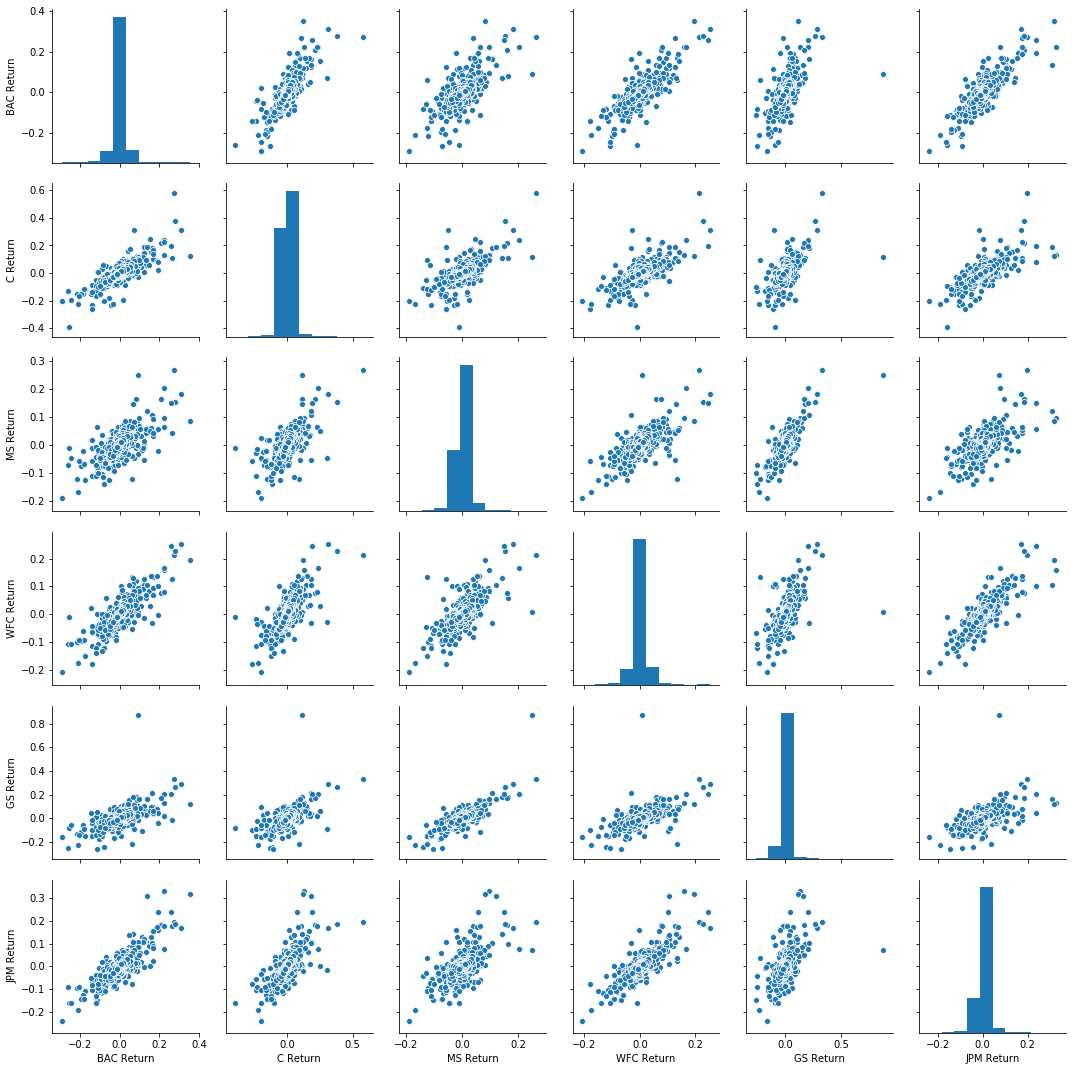

In [108]:
sns.pairplot(data=returns)

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [109]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
MS Return    2008-11-24
WFC Return   2009-01-21
GS Return    2008-10-13
JPM Return   2008-07-16
dtype: datetime64[ns]

In [110]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
MS Return    2009-01-20
WFC Return   2009-01-20
GS Return    2008-10-09
JPM Return   2009-01-20
dtype: datetime64[ns]

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [111]:
returns.std()

BAC Return    0.036647
C Return      0.038672
MS Return     0.025390
WFC Return    0.027667
GS Return     0.037819
JPM Return    0.030238
dtype: float64

In [114]:
returns['2015'].std()

BAC Return    0.016163
C Return      0.015289
MS Return     0.014046
WFC Return    0.014017
GS Return     0.016249
JPM Return    0.012591
dtype: float64

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

In [115]:
sns.set_style('whitegrid')

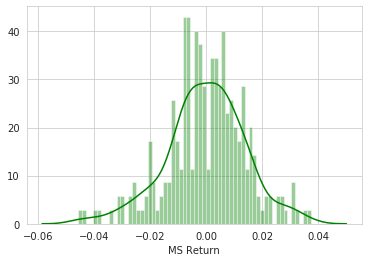

In [126]:
sns.distplot(returns['2015']['MS Return'], color='green', bins=60)

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

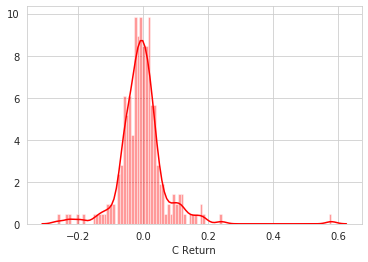

In [128]:
sns.distplot(returns['2008']['C Return'], color='red', bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [130]:
import matplotlib.pyplot as plt

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time.**

In [136]:
bank_stocks.xs('Close', level=1, axis=1).head()

Bank Ticker,BAC,C,MS,WFC,GS,JPM
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999


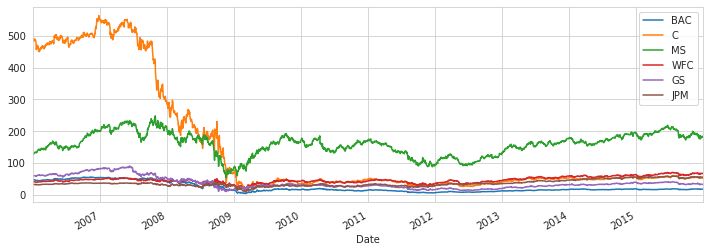

In [144]:
# Plot with for loop
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

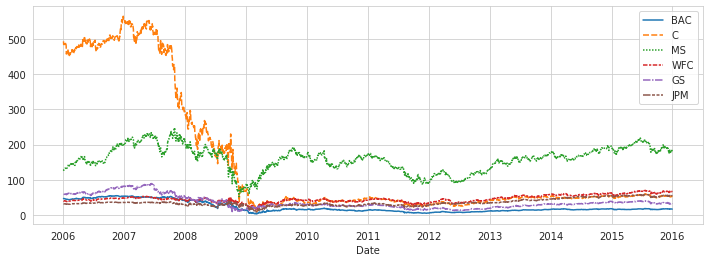

In [147]:
# Plot using xs() function
plt.figure(figsize=(12,4))
sns.lineplot(data=bank_stocks.xs('Close', level=1, axis=1))

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

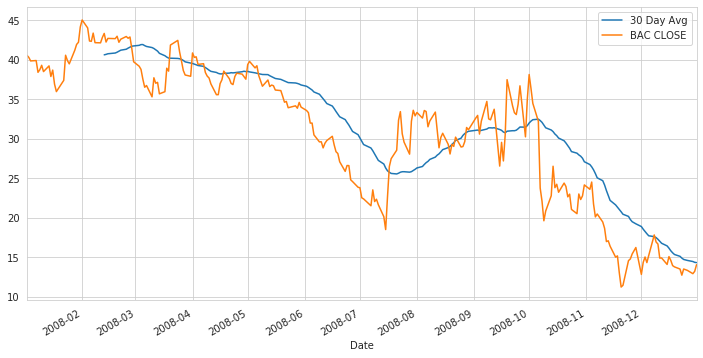

In [153]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008'].plot(label='BAC CLOSE')
plt.legend()

**Create a heatmap of the correlation between the stocks Close Price.**

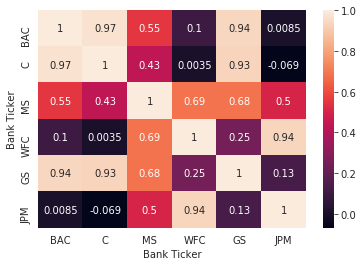

In [155]:
sns.heatmap(bank_stocks.xs('Close', level=1, axis=1).corr(), annot=True)

**Optional: Use seaborn's clustermap to cluster the correlations together:**

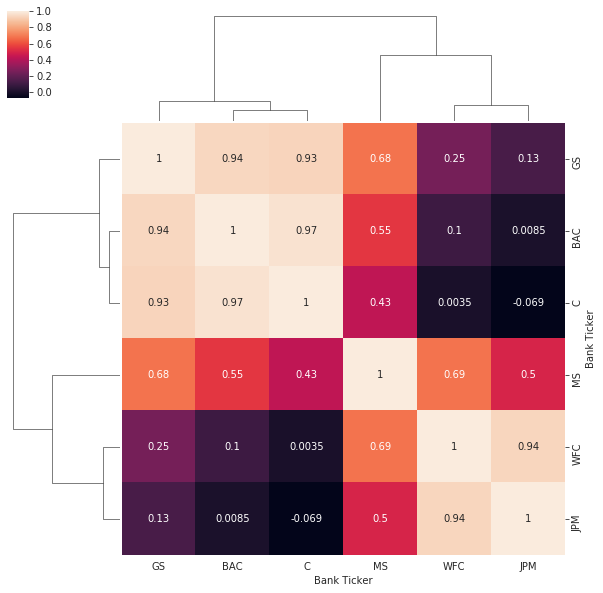

In [156]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [162]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots.

**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [165]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015'].iplot(kind='candle')

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [166]:
MS['Close'].loc['2015'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [167]:
BAC['Close'].loc['2015'].ta_plot(study='boll')